## Milestone 1

## Import libraries

In [1]:
%load_ext rpy2.ipython

In [2]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

## GET request to list the available files

In [3]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "figshare/"

In [4]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [5]:
%%time
files_to_dl = ["data.zip"]  # feel free to add other files here
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 4.59 s, sys: 6.95 s, total: 11.5 s
Wall time: 5min 50s


In [6]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 18.7 s, sys: 2.9 s, total: 21.6 s
Wall time: 22.6 s


In [7]:
current_path = %pwd
data_path =  current_path + "/figshare"
%ls -ltr $data_path

total 13838056
drwxr-xr-x  30 macychan  staff        960 Mar 28 15:28 __MACOSX/
-rw-r--r--   1 macychan  staff  707986522 Mar 30 13:28 combined_data_2.feather
-rw-r--r--   1 macychan  staff  814041183 Mar 30 13:52 data.zip
-rw-r--r--   1 macychan  staff   95376895 Mar 30 13:52 MPI-ESM-1-2-HAM_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff   94960113 Mar 30 13:52 AWI-ESM-1-1-LR_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff   82474546 Mar 30 13:52 NorESM2-LM_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  127613760 Mar 30 13:52 ACCESS-CM2_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  232118894 Mar 30 13:52 FGOALS-f3-L_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  330360682 Mar 30 13:52 CMCC-CM2-HR4_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  254009247 Mar 30 13:52 MRI-ESM2-0_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  235661418 Mar 30 13:52 GFDL-CM4_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  294260911 Mar 30 13:52 

## Combining data CSVs



In [8]:
%%time
files_to_combine = glob.glob(data_path + "/*.csv")
files_to_combine.remove(data_path + "/observed_daily_rainfall_SYD.csv")
df = pd.concat(
    (pd.read_csv(file, index_col=0, parse_dates=True)
                .assign(model=re.findall(r'[^\/&\\]+(?=_daily_rainfall_NSW\.)', file)[0])
                for file in files_to_combine)
    )
df.to_csv(current_path + "/combined_data.csv")

CPU times: user 8min 19s, sys: 23.2 s, total: 8min 42s
Wall time: 8min 50s


In [9]:
print(df.shape)

(62467843, 6)


In [10]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


## Load the combined CSV to memory and perform a simple EDA

In [11]:
df.shape

(62467843, 6)

**Observations:**

This is a relatively large dataset with 62,467,843 instances and 6 features. So, running the whole data set for data wrangling and analysis may be time-consuming. 

In [12]:
df.dtypes

lat_min          float64
lat_max          float64
lon_min          float64
lon_max          float64
rain (mm/day)    float64
model             object
dtype: object

**Observations:**

As the memory usage is quite large (around 3.7+ GB), running `df.info()` would not be an efficient way to extract data type information. Instead, we used `df.dtypes`, which gives desired information with minimal time. 

As we can observe from the result, there are five numerical features ("lat_min", "lat_max", "lon_min", "lon_max", "rain (mm/day)") and one categorical feature ("model"). And all numerical features is the data type of `float 64`, which consumes a lot of memory; therefore, we may think about changing data types to decrease the memory usage. 

### Change data types of numerical features

In [13]:
%%time
# Change data types of numerical features
data_types = {'lat_min': 'float16', 
          'lat_max': 'float16', 
          'lon_min': 'float16', 
          'lon_max': 'float16',
          'rain (mm/day)':'float16',
          'model':'str'}
df_1 = pd.read_csv(current_path + "/combined_data.csv", index_col=0, parse_dates=True, dtype=data_types)
print(df_1["model"].value_counts())

MPI-ESM1-2-HR       5154240
CMCC-CM2-HR4        3541230
CMCC-ESM2           3541230
CMCC-CM2-SR5        3541230
NorESM2-MM          3541230
TaiESM1             3541230
SAM0-UNICON         3541153
GFDL-ESM4           3219300
FGOALS-f3-L         3219300
GFDL-CM4            3219300
MRI-ESM2-0          3037320
EC-Earth3-Veg-LR    3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM4-8           1609650
INM-CM5-0           1609650
FGOALS-g3           1287720
KIOST-ESM           1287720
AWI-ESM-1-1-LR       966420
MPI-ESM1-2-LR        966420
NESM3                966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: user 1min 13s, sys: 7.64 s, total: 1min 20s
Wall time: 1min 22s


In [14]:
df_1.dtypes

lat_min          float16
lat_max          float16
lon_min          float16
lon_max          float16
rain (mm/day)    float16
model             object
dtype: object

In [15]:
len(df_1["model"].unique())

27

In [16]:
print(f"Memory usage with float64: {df.memory_usage().sum() / 1e6:.2f} MB")
print(f"Memory usage with float16: {df_1.memory_usage().sum() / 1e6:.2f} MB")

Memory usage with float64: 3498.20 MB
Memory usage with float16: 1624.16 MB


**Observations:**

By changing the data types of numerical features from `float 64` to `float 16`, we successfully reduce the memory usage by almost a half. However, we are not able to know the most suitable data type for each column before changing it.

There are 27 unique models in the data frame, and each of them has at least 550,000 instances. Additionally, the model has the highest number of examples is MPI-ESM1-2-HR, and the model with the lowest number of examples is CanESM5

### Load just the columns we want

In [17]:
%%time
# Choose columns, which are needed
use_cols = ['rain (mm/day)', 'model']
df_2 = pd.read_csv(current_path + "/combined_data.csv", usecols=use_cols)
print(df_2["model"].value_counts())

MPI-ESM1-2-HR       5154240
CMCC-CM2-HR4        3541230
CMCC-ESM2           3541230
CMCC-CM2-SR5        3541230
NorESM2-MM          3541230
TaiESM1             3541230
SAM0-UNICON         3541153
GFDL-ESM4           3219300
FGOALS-f3-L         3219300
GFDL-CM4            3219300
MRI-ESM2-0          3037320
EC-Earth3-Veg-LR    3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM4-8           1609650
INM-CM5-0           1609650
FGOALS-g3           1287720
KIOST-ESM           1287720
AWI-ESM-1-1-LR       966420
MPI-ESM1-2-LR        966420
NESM3                966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: user 35.4 s, sys: 2.91 s, total: 38.3 s
Wall time: 38.5 s


In [18]:
print(f"Original memory usage: {df.memory_usage().sum() / 1e6:.2f} MB")
print(f"Memory usage after loading selected columns: {df_2.memory_usage().sum() / 1e6:.2f} MB")

Original memory usage: 3498.20 MB
Memory usage after loading selected columns: 999.49 MB


**Observations:**

As our main interest is the rainfall, so in order to speed up the process, we only load the needed columns. By reducing the number of columns, we are able to reduce the time to 34.5 sec, which is a big improvement on processing time. Also, the memory usage is way lower than the original data frame. However, we do not know which column would be unnecessary for future analysis. For example, if we would like to perform spatial visualization for rainfall, then latitude and longitude may be useful.

### Process data in chunks

In [19]:
%%time
#process data in chunks
df_3 = pd.Series(dtype=float)
for chunk in pd.read_csv(current_path + "/combined_data.csv", chunksize=10_000_000):
    df_3 = df_3.add(chunk["model"].value_counts(), fill_value=0)
print(df_3.astype(float))

ACCESS-CM2          1932840.0
ACCESS-ESM1-5       1610700.0
AWI-ESM-1-1-LR       966420.0
BCC-CSM2-MR         3035340.0
BCC-ESM1             551880.0
CMCC-CM2-HR4        3541230.0
CMCC-CM2-SR5        3541230.0
CMCC-ESM2           3541230.0
CanESM5              551880.0
EC-Earth3-Veg-LR    3037320.0
FGOALS-f3-L         3219300.0
FGOALS-g3           1287720.0
GFDL-CM4            3219300.0
GFDL-ESM4           3219300.0
INM-CM4-8           1609650.0
INM-CM5-0           1609650.0
KIOST-ESM           1287720.0
MIROC6              2070900.0
MPI-ESM-1-2-HAM      966420.0
MPI-ESM1-2-HR       5154240.0
MPI-ESM1-2-LR        966420.0
MRI-ESM2-0          3037320.0
NESM3                966420.0
NorESM2-LM           919800.0
NorESM2-MM          3541230.0
SAM0-UNICON         3541153.0
TaiESM1             3541230.0
dtype: float64
CPU times: user 1min 3s, sys: 8.35 s, total: 1min 12s
Wall time: 1min 12s


**Observations:**

By loading data in chunks with chunk size of 10 millions, we can reduce the loading time to 1min and 3s!

### Perform a simple EDA in R

In [20]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
%%R
#library(feather)
library(arrow)
library(dplyr, warn.conflicts = FALSE)

R[write to console]: 
Attaching package: ‘arrow’


R[write to console]: The following object is masked from ‘package:utils’:

    timestamp




#### Process data in chunks (`df_3`)

Since the Pandas Series is fairly small, it can easily be done with Pandas Exchange, aka IPython magic integration.

In [22]:
print(f"Memory usage of df_3: {df_3.memory_usage() / 1e3:.2f} KB")

Memory usage of df_3: 0.43 KB


In [23]:
%%time
%%R -i df_3
df_3

      ACCESS-CM2    ACCESS-ESM1-5   AWI-ESM-1-1-LR      BCC-CSM2-MR 
         1932840          1610700           966420          3035340 
        BCC-ESM1     CMCC-CM2-HR4     CMCC-CM2-SR5        CMCC-ESM2 
          551880          3541230          3541230          3541230 
         CanESM5 EC-Earth3-Veg-LR      FGOALS-f3-L        FGOALS-g3 
          551880          3037320          3219300          1287720 
        GFDL-CM4        GFDL-ESM4        INM-CM4-8        INM-CM5-0 
         3219300          3219300          1609650          1609650 
       KIOST-ESM           MIROC6  MPI-ESM-1-2-HAM    MPI-ESM1-2-HR 
         1287720          2070900           966420          5154240 
   MPI-ESM1-2-LR       MRI-ESM2-0            NESM3       NorESM2-LM 
          966420          3037320           966420           919800 
      NorESM2-MM      SAM0-UNICON          TaiESM1 
         3541230          3541153          3541230 
CPU times: user 43.8 ms, sys: 19.8 ms, total: 63.6 ms
Wall time: 57.

#### Load just the columns we want (`df_2`)

`df_2` is close to 1GB, which is already too large for Pandas Exchange to handle.  But currently this is the only possible way.  `arrow` package in R is not working correctly with `parquet` or `feather` files.

In [24]:
%%time
%%R -i df_2
head(df_2) 

  rain (mm/day)           model
0  4.244226e-13 MPI-ESM-1-2-HAM
1  4.217326e-13 MPI-ESM-1-2-HAM
2  4.498125e-13 MPI-ESM-1-2-HAM
3  4.251282e-13 MPI-ESM-1-2-HAM
4  4.270161e-13 MPI-ESM-1-2-HAM
5  4.197289e-13 MPI-ESM-1-2-HAM
CPU times: user 25min 14s, sys: 1min 23s, total: 26min 38s
Wall time: 3h 34min 40s


It takes a long time for Pandas Exchange to pass the `df_2` to R.  The following is the output from running the above cell one time:

```r
  rain (mm/day)           model
0  4.244226e-13 MPI-ESM-1-2-HAM
1  4.217326e-13 MPI-ESM-1-2-HAM
2  4.498125e-13 MPI-ESM-1-2-HAM
3  4.251282e-13 MPI-ESM-1-2-HAM
4  4.270161e-13 MPI-ESM-1-2-HAM
5  4.197289e-13 MPI-ESM-1-2-HAM
CPU times: user 12min 15s, sys: 1min 18s, total: 13min 33s
Wall time: 14min 27s
```

In [25]:
# %%R
# object.size(df_2)

### Simple EDA in R

In [26]:
%%time
%%R
glimpse(df_2)

Rows: 62,467,843
Columns: 2
$ `rain (mm/day)` <dbl> 4.244226e-13, 4.217326e-13, 4.498125e-13, 4.251282e-13…
$ model           <chr> "MPI-ESM-1-2-HAM", "MPI-ESM-1-2-HAM", "MPI-ESM-1-2-HAM…
CPU times: user 25 ms, sys: 114 ms, total: 139 ms
Wall time: 322 ms


The number of rows and columns as well as the data types of the 2 columns are shown above.

In [27]:
%%time
%%R
summary(df_2)

 rain (mm/day)        model          
 Min.   :  0       Length:62467843   
 1st Qu.:  0       Class :character  
 Median :  0       Mode  :character  
 Mean   :  2                         
 3rd Qu.:  1                         
 Max.   :433                         
 NA's   :3219300                     
CPU times: user 8.13 s, sys: 7.1 s, total: 15.2 s
Wall time: 18.3 s


In [28]:
%%R
df_2 <- df_2 |>
    rename(rain = "rain (mm/day)")
head(df_2)
    

          rain           model
0 4.244226e-13 MPI-ESM-1-2-HAM
1 4.217326e-13 MPI-ESM-1-2-HAM
2 4.498125e-13 MPI-ESM-1-2-HAM
3 4.251282e-13 MPI-ESM-1-2-HAM
4 4.270161e-13 MPI-ESM-1-2-HAM
5 4.197289e-13 MPI-ESM-1-2-HAM


In [29]:
%%R
library(ggplot2)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



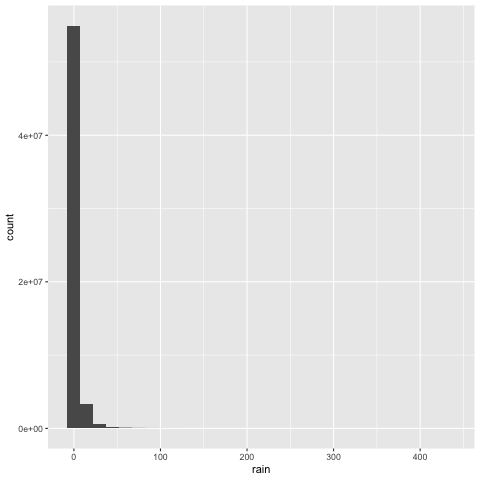

CPU times: user 58.2 s, sys: 16.9 s, total: 1min 15s
Wall time: 1min 20s


In [30]:
%%time
%%R
hist <- df_2 |>
    ggplot(aes(x=rain)) +
    geom_histogram()
hist

As can be seen above, the majority of the values are very small values.

#### Feather file
We tried to save the dataframe to `feather` file and read it into R, but there is an unknown issue with `arrow` that the R kernel dies.

In [31]:
%%time
df_2.to_feather(data_path + "/combined_data_2.feather")

CPU times: user 3.5 s, sys: 2.5 s, total: 6 s
Wall time: 5.5 s


In [32]:
df_2 

,rain (mm/day),model
0,4.244226e-13,MPI-ESM-1-2-HAM
1,4.217326e-13,MPI-ESM-1-2-HAM
2,4.498125e-13,MPI-ESM-1-2-HAM
3,4.251282e-13,MPI-ESM-1-2-HAM
4,4.270161e-13,MPI-ESM-1-2-HAM
...,...,...
62467838,6.689683e+00,SAM0-UNICON
62467839,7.862555e+00,SAM0-UNICON
62467840,1.000503e+01,SAM0-UNICON
62467841,8.541592e+00,SAM0-UNICON


In [33]:
%%time 
# Checking that the feather file is created correctly.
df_2_test = pd.read_feather(data_path + "/combined_data_2.feather")
df_2_test

CPU times: user 2.7 s, sys: 1.62 s, total: 4.32 s
Wall time: 3.16 s


,rain (mm/day),model
0,4.244226e-13,MPI-ESM-1-2-HAM
1,4.217326e-13,MPI-ESM-1-2-HAM
2,4.498125e-13,MPI-ESM-1-2-HAM
3,4.251282e-13,MPI-ESM-1-2-HAM
4,4.270161e-13,MPI-ESM-1-2-HAM
...,...,...
62467838,6.689683e+00,SAM0-UNICON
62467839,7.862555e+00,SAM0-UNICON
62467840,1.000503e+01,SAM0-UNICON
62467841,8.541592e+00,SAM0-UNICON


The following cell is commented out because the kernel dies for some unknown reason with `read_feather` function of `arrow` package.

In [34]:
%%time
%%R -i data_path
df_2 <- read_feather(base::paste0(data_path, "/combined_data_2.feather"))
head(df_2)

# A tibble: 6 × 2
  `rain (mm/day)` model          
            <dbl> <chr>          
1        4.24e-13 MPI-ESM-1-2-HAM
2        4.22e-13 MPI-ESM-1-2-HAM
3        4.50e-13 MPI-ESM-1-2-HAM
4        4.25e-13 MPI-ESM-1-2-HAM
5        4.27e-13 MPI-ESM-1-2-HAM
6        4.20e-13 MPI-ESM-1-2-HAM
CPU times: user 4.18 s, sys: 2.36 s, total: 6.54 s
Wall time: 5.54 s


## Compare performance

#### Performance for Combining Data CSV

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |     Windows      |16GB | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz | yes | 9min 29s |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes | 7min 19s |
| Steven Leung|          Mac           |  16GB   |     Apple M1      |    yes    |     7min 25s       |
| Zack Tang   |     Mac          |16GB | 2.2 GHz 6-Core Intel Core i7                 | yes | 7min 25s |      

#### Performance for EDA in python (Changing data types)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |        Windows          | 16GB    | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz          |  yes      | 3mins 48s           |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes | 1min 7s |
| Steven Leung|       Mac           |  16GB   |     Apple M1      |    yes    |     1min 2s       |
| Zack Tang   |     Mac         |   16GB  |       2.2 GHz 6-Core Intel Core i7    |    yes    | 1min 2s |

#### Performance for EDA in python (Loading what is needed)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |     Windows             | 16GB    | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz          |  yes      | 1min 26s           |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes | 31.8s |
| Steven Leung|      Mac           |  16GB   |     Apple M1      |    yes    |     30.3s       |
| Zack Tang   |     Mac         |   16GB  |       2.2 GHz 6-Core Intel Core i7    |    yes    | 30.9s |

#### Performance for EDA in python (Loading data in chunks)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |    Windows              | 16GB    | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz           | yes       | 2mins 16s           |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes |  59.5 s |
| Steven Leung|      Mac           |  16GB   |     Apple M1      |    yes    |     52.3s       |
| Zack Tang   |     Mac         |   16GB  |       2.2 GHz 6-Core Intel Core i7    |    yes    | 1min 3s |

